In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Getting the data

In [9]:
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Knowing the data

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: ylabel='count'>

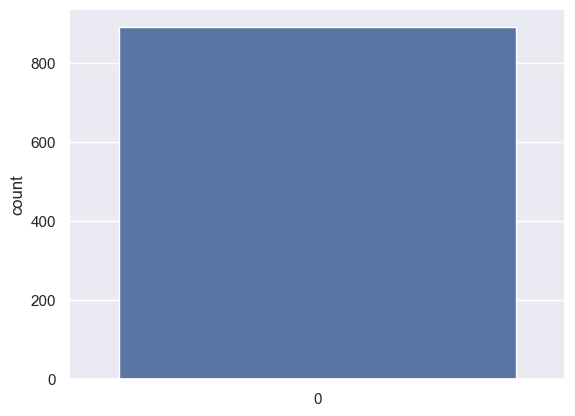

In [12]:
# Checking our target column
sns.countplot(train_data['Survived'])

In [13]:
# Checking for null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**As we can see that the Cabin column has a lot of missing values ans is of no use to us so we will drop it along with PassengerID.**

In [14]:
train_data.drop(columns=['Cabin','PassengerId',],inplace=True)

In [15]:
# Checking the corelation in the data
train_data.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

**Fare coulumn is weakly positively coreleated while the Pclass column is weakly neagative corealted.**

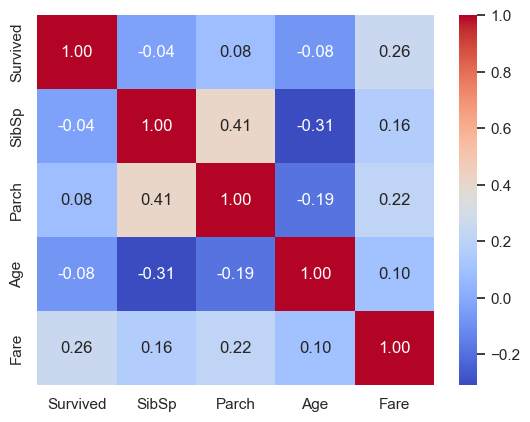

In [16]:
g = sns.heatmap(train_data[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

## EDA (Exploratory Data Analysis)

In [17]:
# Starting with the Sex column
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

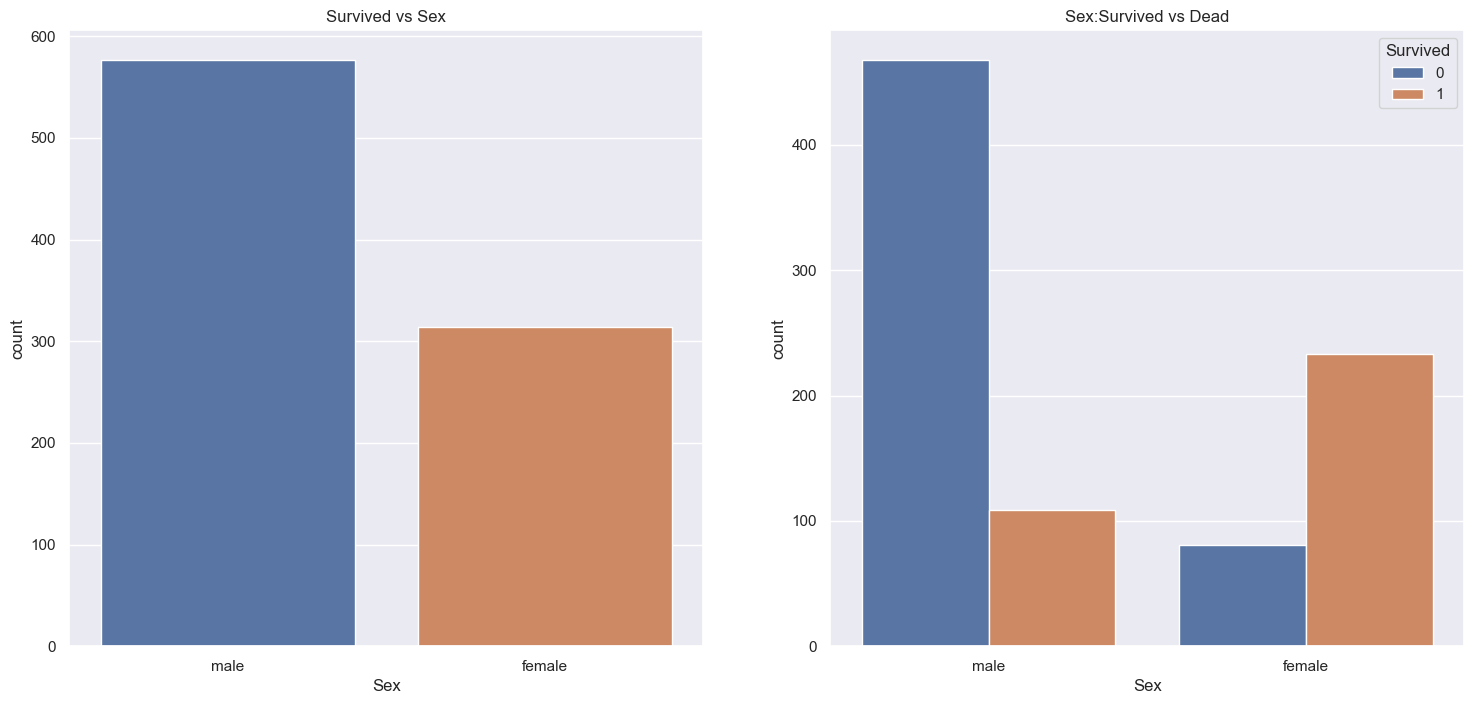

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(x = 'Sex',data = train_data,ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex',data = train_data,hue='Survived',ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

**The number of male was more than the number of female on the ship.<br>
The number of female survived are much more as compared to male.**

In [19]:
# Checking the Pclass column
train_data.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

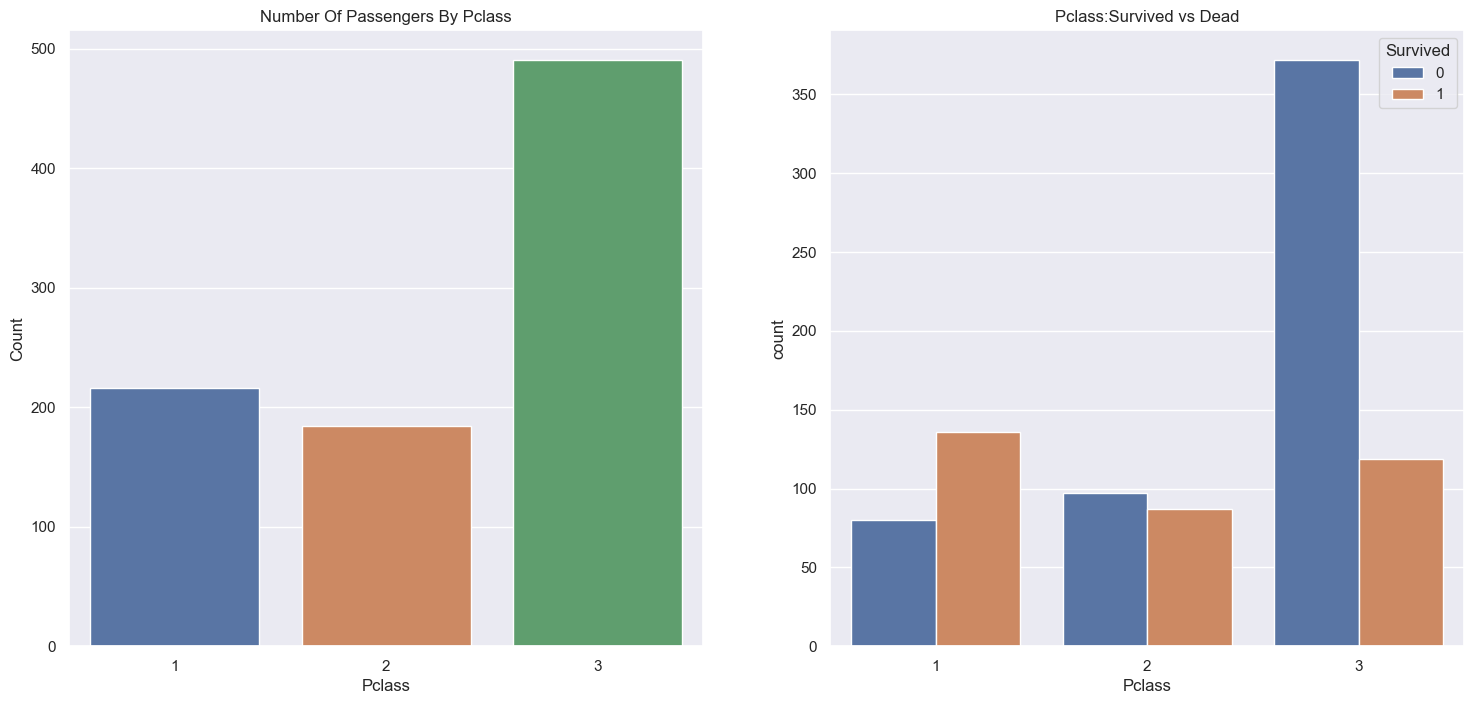

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(x='Pclass',data=train_data,ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

**Most of the people on the ship belongs to the 3rd class.<br>
Most people that suvived belongs to the 1st class.**

In [21]:
# Checking the Embarked column
train_data.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

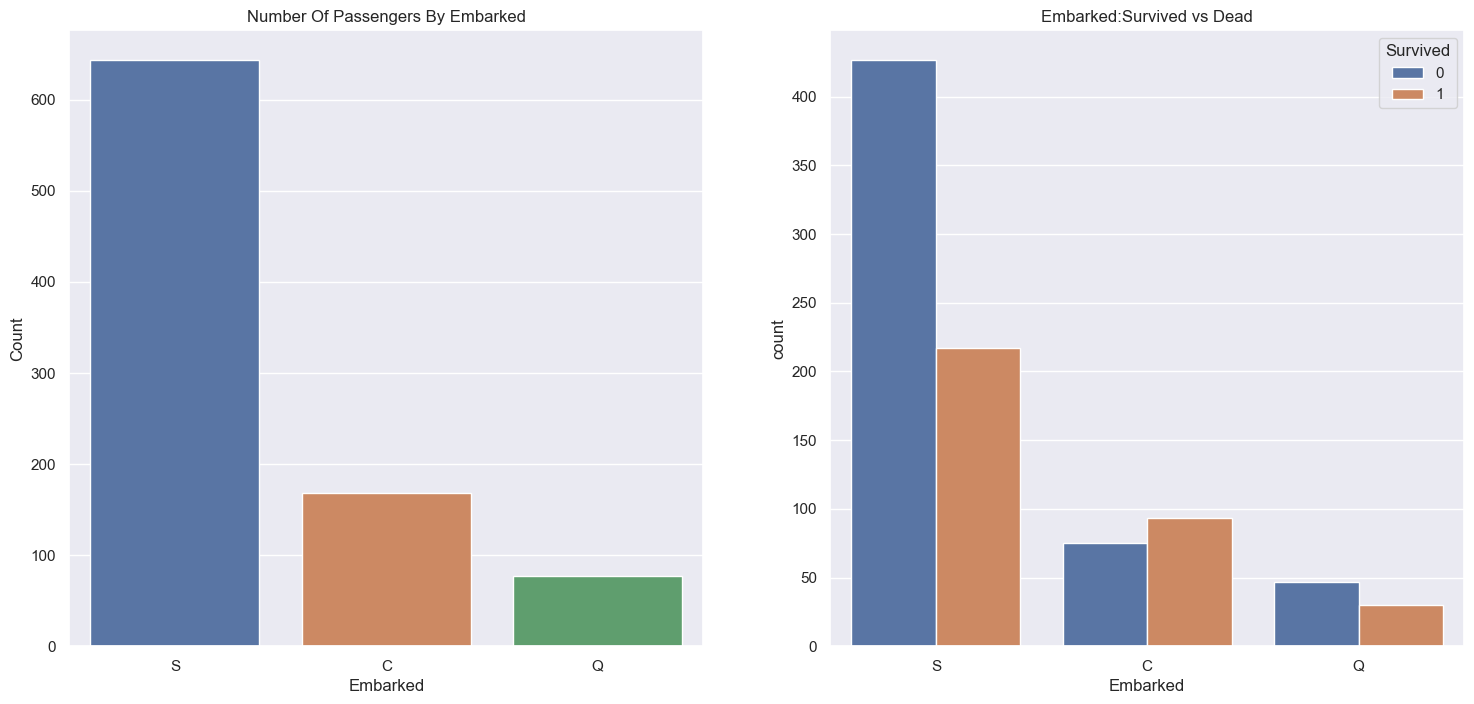

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(x='Embarked',data=train_data,ax=ax[0])
ax[0].set_title('Number Of Passengers By Embarked')
ax[0].set_ylabel('Count')
sns.countplot(x='Embarked',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

**Number of people embarking in Southampton (S) are the highest followed by Cherbourg (C).<br>
Most of the people that survied also belong to Southampton as it has the most number of people hence most of the survived people belong to it.**

In [23]:
# Checking the SibSp column
train_data.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

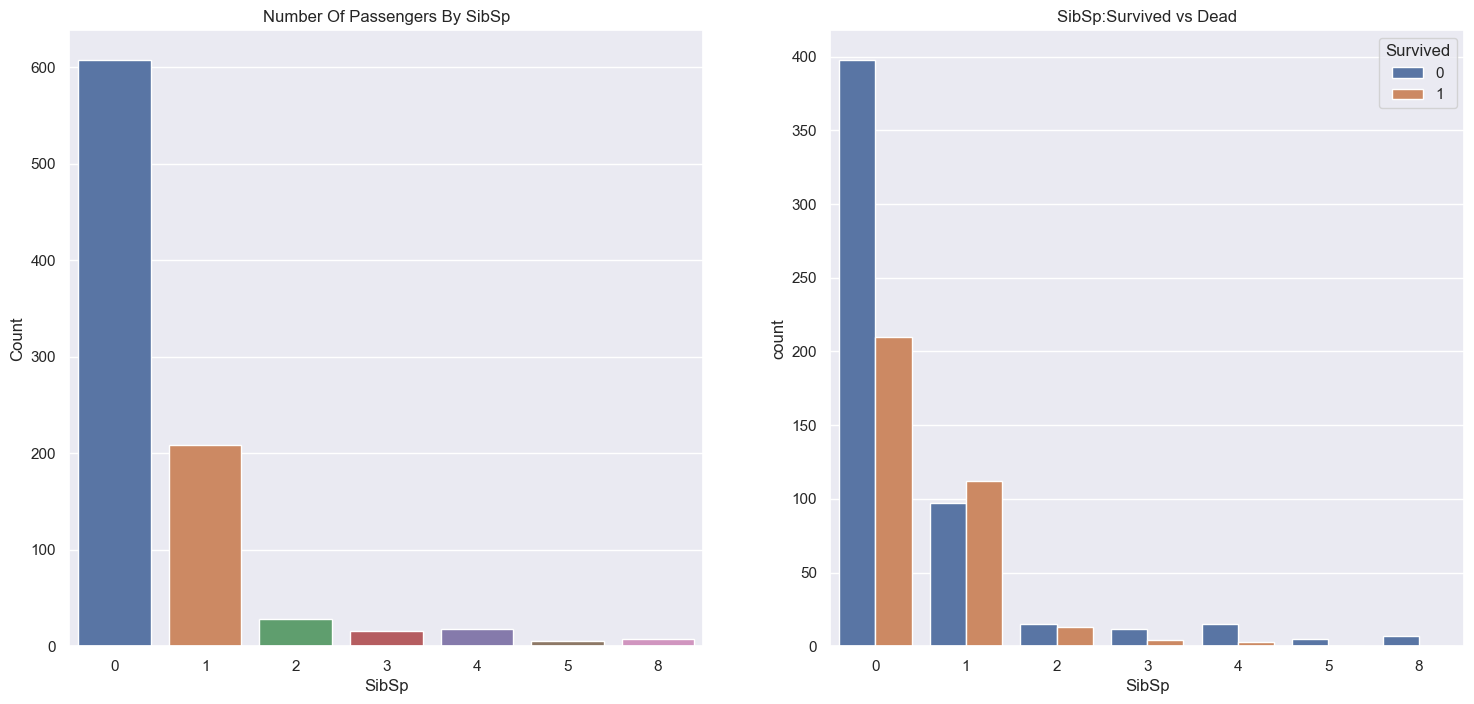

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(x='SibSp',data=train_data,ax=ax[0])
ax[0].set_title('Number Of Passengers By SibSp')
ax[0].set_ylabel('Count')
sns.countplot(x='SibSp',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('SibSp:Survived vs Dead')
plt.show()

In [25]:
# Checking the Parch column
train_data.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

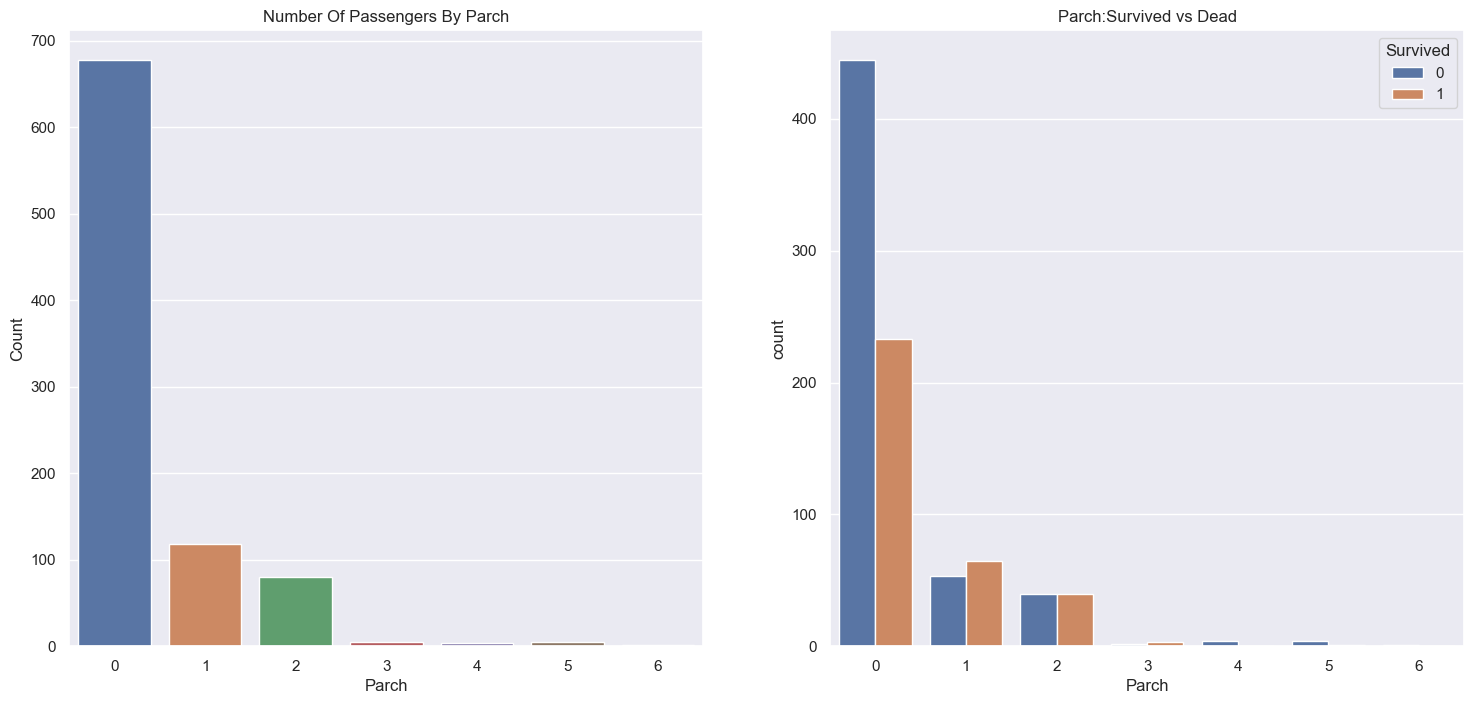

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(x='Parch',data=train_data,ax=ax[0])
ax[0].set_title('Number Of Passengers By Parch')
ax[0].set_ylabel('Count')
sns.countplot(x='Parch',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Parch:Survived vs Dead')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

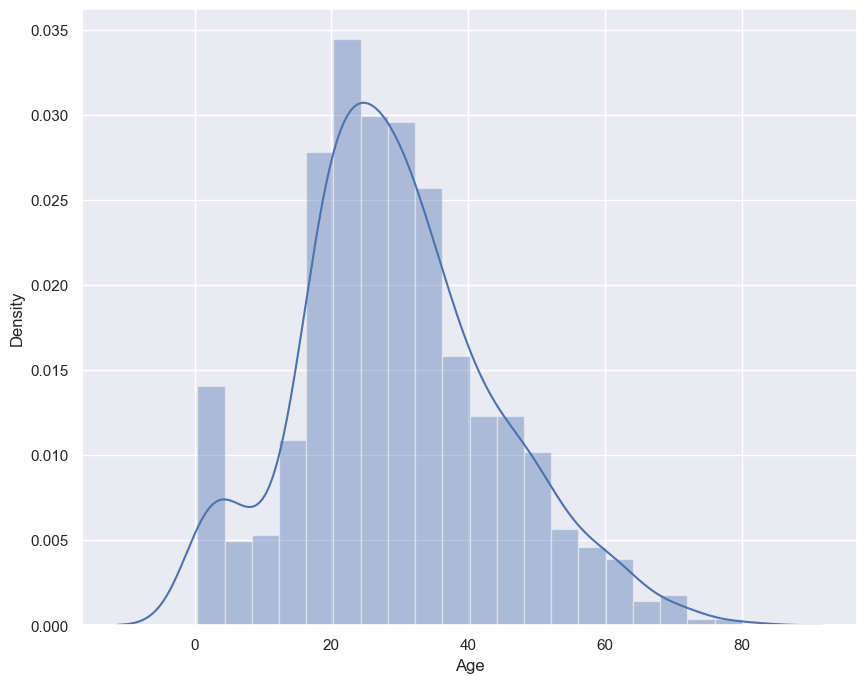

In [27]:
# Checking the age column
plt.figure(figsize = (10,8))
sns.distplot(train_data['Age'])

<Axes: >

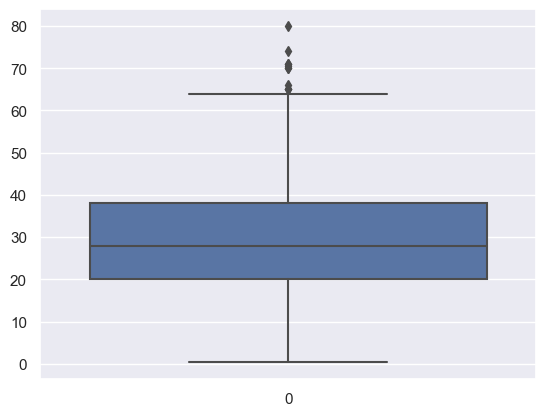

In [28]:
sns.boxplot(train_data['Age'])

In [29]:
train_data[train_data['Age']>70]['Survived'].value_counts()

0    4
1    1
Name: Survived, dtype: int64

<Axes: xlabel='Fare', ylabel='Density'>

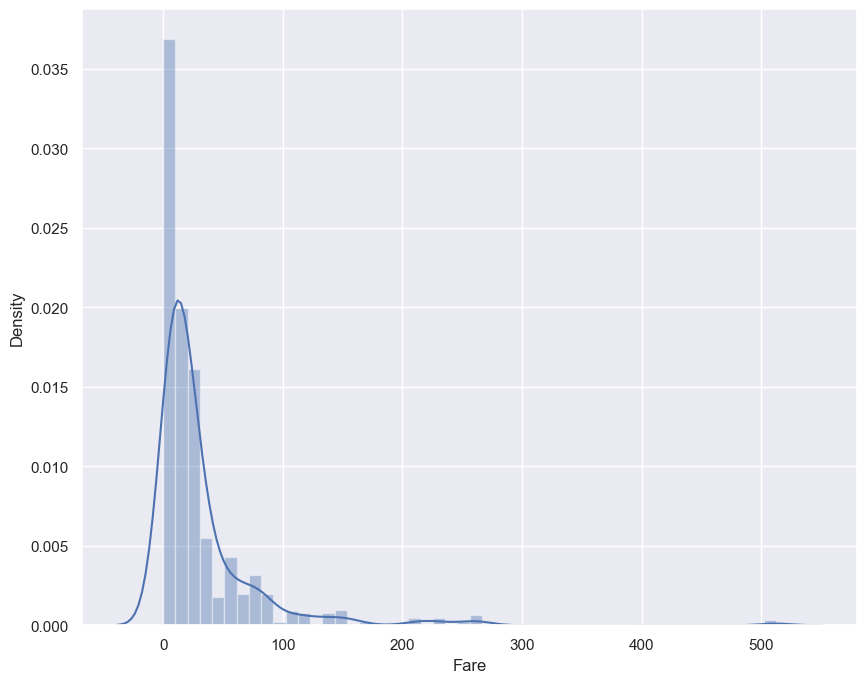

In [30]:
# Checking the fare cloumn
plt.figure(figsize = (10,8))
sns.distplot(train_data['Fare'])

<Axes: >

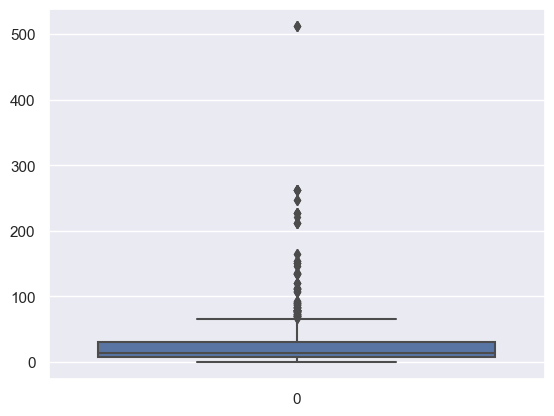

In [31]:
sns.boxplot(train_data['Fare'])

In [32]:
train_data[train_data['Fare']>300]['Survived'].value_counts()

1    3
Name: Survived, dtype: int64

In [33]:
# Checking the Name column
train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [35]:
combine = [train_data]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [36]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [37]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [38]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [39]:
train_data = train_data.drop(['Name'], axis = 1)

## Missing values

In [40]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [41]:
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

In [42]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [43]:
train_data = train_data.fillna({"Embarked": "S"})

## Feature Engineering

In [44]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,2
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,3,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,1
3,1,1,female,35.0,1,0,113803,53.1000,S,3,2
4,0,3,male,35.0,0,0,373450,8.0500,S,1,1


In [45]:
train_data.drop(columns=['SibSp','Parch','Ticket'],inplace=True)

In [46]:
train_data= pd.get_dummies(train_data,drop_first =True)
train_data.head()

,Survived,Pclass,Age,Fare,Title,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,2,1,0,1
1,1,1,38.0,71.2833,3,2,0,0,0
2,1,3,26.0,7.9250,2,1,0,0,1
3,1,1,35.0,53.1000,3,2,0,0,1
4,0,3,35.0,8.0500,1,1,1,0,1


In [47]:
train_data.corr()['Survived'].sort_values(ascending = False)

Survived      1.000000
Title         0.373139
Fare          0.257307
FamilySize    0.016639
Embarked_Q    0.003650
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64

In [48]:
# Splitting the data
X = train_data.drop(['Survived'],axis = 1) 
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
# Scaling the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Modeling

In [50]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       134
           1       0.73      0.74      0.74        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [51]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       134
           1       0.82      0.73      0.77        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [52]:
#params = {'n_estimators': [100,500,1000],
#          'max_features': ['sqrt', 'log2'], 
#          'max_depth' : [2,5,8],
#          'min_samples_leaf':[1,4,8]}

#grid_search_cv = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1)
#grid_search_cv.fit(X_train, y_train)
#grid_search_cv.best_estimator_

In [53]:
# Random Forest
randomforest = RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=1000)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       134
           1       0.82      0.74      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [54]:
# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       134
           1       0.81      0.75      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [55]:
#params = {'n_estimators': [100,500,1000],
#         'learning_rate': [0.001,0.01,0.5,0.1]}

#grid_search_cv = GridSearchCV(AdaBoostClassifier(), params, n_jobs=-1)
#grid_search_cv.fit(X_train, y_train)
#grid_search_cv.best_estimator_

In [56]:
# AdaBoost Classifier
clf = AdaBoostClassifier(learning_rate=0.5, n_estimators=500)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       134
           1       0.79      0.79      0.79        89

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



## ★·.·´¯`·.·★ Ｔℍᗩ𝕟Ⓚ ㄚ𝕠𝓤 ★·.·´¯`·.·★